#  Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# Temperature distribution in a heat conductor


The distribution of temperature in the interior of heat conducting materials, in steady state and in the absence of internal heat sources, satisfies Laplace's equation. To determine the distribution of heat in a body,the solution of Laplace’s equation requires boundary conditions, either on the temperature on the boundary or the temperature gradient on the boundary.We will use Gauss-Seidel with overrelaxation  and Jacobi method and compare these two methods. To obtain the solution of a field T (x, y) that satisfies Laplace’s equation (1)
\begin{equation} 
\Delta T=\frac{\partial^2T }{\partial x^2}+\frac{\partial^2T }{\partial y^2}\ (1)
\end{equation}
\begin{equation}
T(x,y)\leftarrow \frac{(1+\omega)}{4}[T(x+a,y)+T(x-a,y)+T(x,y-a)+T(x,y+a)]-\omega T(x,y)\ (2)
\end{equation}
\begin{equation}
T_{\omega}(x,y)=T(x,y)+(1+\omega)\Delta T(x,y), where \ \Delta T(x,y)is\ change\ in\ T\ on\ each\ step\ (3)
\end{equation}
Equation (2) is the fomula we will use to solve the Laplace's equation, and we will use equation (3) when we have to calculate the change in function after each iteration.


(a)(b)(c)[all together] 
(a)We will rite a program to calculate the distribution of temperature under steady state conditions and in the absence of heat sources, using Gauss-Seidel relaxation with replacement and overrelaxation. Construct a grid of spacing 0.1 cm. The program will produce a contour plot of the temperature distribution as a function of x and y. We will make the script animate the process of iteration, with one frame at each iteration. For (b),To evaluate the impact of overrelaxation, run the program two times for 100 iterations: first with w= 0.0 and second with  w= 0.9. Setting w=0 means using Jacobi method without overrelaxation and setting w=0.9 means using Gauss-Seidel method with overrelaxation. Finally we will produce a plot of the solution for each case. For (c) with w=0.9, find the temperature at the point x = 2.5 cm, y = 1 cm. and discuss the symmetry about the vertical bisector x=10 as we oberve the animation.

First, set the boundary conditions which does not change. Since the shape of area is indented rectangle, we will make it as rectangle of 20cm * 8cm 

In [1]:
#import module
from numpy import empty,linspace
from pylab import imshow,show,clf,pause,draw,colorbar,title
#set the boundary conditions
N = 80         # Grid squares on a vertical side
M=200          # Grid squares on a horizontal side
# set boundary conditions 
GH = 10         
CD=7
HA=linspace(10,0,81)
GF=linspace(10,0,81)
AB=linspace(0,5,51)
CB=linspace(7,5,31)
DE=linspace(7,5,31)
EF=linspace(5,0,51)
BE=0

Set the Target accuracy and set the value of omega for equation (2). We will use two values  of omega (0, 0.9) to compare the overrelaxation method with relaxation method.

In [2]:
target = 1e-6   # Target accuracy
omega=0.9 # FOR PART B, SET omega = 0.

Create matrix T(x,y) of size 200*80 with ramdom elements using numpy empty funciton. We used phi(y,x) intead of T and notice the first component corresponds to the row and second one corresponds to colomn so we named phi(y,x) instead of phi(x,y).
Then assgin the boundary conditions on the matrix phi(y,x).

In [8]:
#assign boundary conditions
phi = empty([N+1,M+1],float)
phi[0,:] = GH
phi[50,50:150]=CD
phi[:,0]=HA
phi[:,M]=GF
phi[N,:51]=AB
phi[50:,50]=CB
phi[50:,150]=DE
phi[N,150:]=EF
phi[N,51:100]=BE

Write the program to solve the Laplace's equation (1) using (2).
When the (y,x) are same as boundary conditions, it stays the same. Also, when (y,x) are in the area of indented area, make it to zero.
To calculate the change in phi(y,x) on each step, we used equation (3). Then plot the phi(y,x) with w=0.9
And for animating the script, we will save it for the end.

In [5]:
delta=1.0 #set the initial value of delta
######################### solve PDE ################################
while delta>target:
    delta=0 #start with delta=0 on each iteration
    #clf() #clear the plot (for animation)
    # Calculate new values of the phi(y,x)
    for y in range(N+1):
        for x in range(M+1):
            if x==0 or x==M or y==0 or y==N : #HG,HA,GF,AB,BE,EF boundary
                phi[y,x] = phi[y,x] 
            elif x==50 and (y in range(50,81)): #CB boundary
                phi[y,x] = phi[y,x]
            elif y==50 and (x in range(50,151)): #CD boundary
                phi[y,x] = phi[y,x]
            elif x==150 and (y in range(50,81)): #DE boundary
                phi[y,x]= phi[y,x]
                #empty space surrrounded by rectangle CDEB
            elif (x in range(50,150)) and y>50: 
                phi[y,x]= 0 #assign 0
            else:
                # Calculate change of phi
                deltaphi=(phi[y+1,x] + phi[y-1,x]+ phi[y,x+1] + 
                          phi[y,x-1])/4 - phi[y,x]
                phi[y,x] =  phi[y,x] + (1+omega)*deltaphi 
                #calculate new values of phi(y,x)
                if deltaphi>delta:
                    delta = deltaphi #assign delta with value deltaphi
                
    # If we want to Animate, uncomment the following code in spyder
    '''
    imshow(phi,cmap='hot')
    colorbar() 
    draw()
    pause(0.01)
    '''

plot the final phi(y,x) with w= 0.9

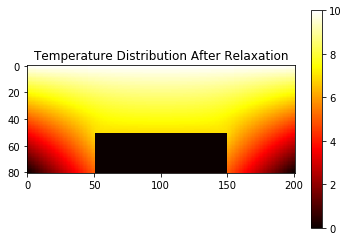

In [6]:
# plot the final phi(y,x) for w=0.9
imshow(phi,cmap='hot')
colorbar()
title('Temperature Distribution After Relaxation')
show()

Plot the phi(y,x) with w=0 (Jacobi method without relaxation)

Find the temperature at the point x = 2.5 cm, y = 1 cm

In [7]:
print('Temperature at the point (2.5,1) is:', phi[10,25])

Temperature at the point (2.5,1) is: 9.03020443827


Discussion (c)
The boundary conditions are symmetric, and our final solution is also symmetric. However, as the animation starts it is not symmetric, and takes a while to fall into a symmetric solution. The reason for this is the way that we defined our array. When we defined phi, we defined it with np.empty, which has very small but slight differences between all of the values. That means that it will take the algorithm a few iterations to 'smooth over' the differences between adjacent data points. This is why we see assymetry at the begining in the middle of the array.


# See Q1b.ipynb for part (b), Q1_animation.py for script to veiw anumation